In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%ls

aisles.csv                      start_note-Copy1.ipynb
departments.csv                 start_note-Copy2.ipynb
mean_days_since_prior_oder.csv  start_note-Copy3.ipynb
order_products__prior.csv       start_note-Copy4.ipynb
order_products__train.csv       start_note-Copy5.ipynb
orders.csv                      start_note.ipynb
product_id_probability.csv      test_duplicated.csv
product_reorederd.csv           train_with_ordered_number.csv
products.csv                    useful_columns_prior.csv
sample_submission-5.csv         useful_columns_train.csv


In [3]:
%matplotlib inline

# loading data

In [4]:
df_order_products_train = pd.read_csv("order_products__train.csv")

In [5]:
df_order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
df_order_products_prior = pd.read_csv("order_products__prior.csv")

In [7]:
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
df_order = pd.read_csv("orders.csv")

In [9]:
df_order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [10]:
df_aisles =  pd.read_csv("aisles.csv")

In [11]:
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
df_departments =  pd.read_csv("departments.csv")

In [13]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [14]:
df_submission = pd.read_csv("sample_submission-5.csv")

In [15]:
df_submission.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [22]:
df_products = pd.read_csv('products.csv')

In [24]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# merge data

## 1. first merge df_order_products and df_products

In [25]:
df_order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [26]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [55]:
 result = pd.merge(df_order_products_train, df_products, on='product_id')

In [60]:
result.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16


In [62]:
df_oreder_products_train_products_merged = result

In [98]:
df_oreder_products_train_products_merged.to_csv('df_oreder_products_train_products_merged.csv', index = False)

##  Analyze department 

In [81]:
df = df_oreder_products_train_products_merged.groupby('department_id').describe()

In [82]:
df.head()

add_to_cart_order                                           \
                          count      mean       std  min  25%  50%   75%   
department_id                                                              
1                      100426.0  9.439926  7.732969  1.0  4.0  7.0  13.0   
2                        1795.0  8.518106  7.719445  1.0  3.0  6.0  12.0   
3                       48394.0  8.541679  7.231486  1.0  3.0  7.0  12.0   
4                      409087.0  8.431048  6.934668  1.0  3.0  7.0  12.0   
5                        5598.0  5.645052  6.363332  1.0  2.0  4.0   7.0   

                     aisle_id             ...  product_id          reordered  \
                max     count        mean ...         75%      max     count   
department_id                             ...                                  
1              76.0  100426.0   69.058202 ...    36766.00  49681.0  100426.0   
2              67.0    1795.0    6.000000 ...    38662.00  49613.0    1795.0   
3              70.0   48394.0  100.462392 ...    35383.00  49686.0   48394.0   
4              80.0  409087.0   64.666171 ...    39812.00  49683.0  409087.0   
5              75.0    5598.0   59.591819 ...    39606.25  49606.0    5598.0   

                                                            
                   mean       std  min  25%  50%  75%  max  
department_id                                               
1              0.559297  0.496474  0.0  0.0  1.0  1.0  1.0  
2              0.388301  0.487499  0.0  0.0  0.0  1.0  1.0  
3              0.634211  0.481656  0.0  0.0  1.0  1.0  1.0  
4              0.664617  0.472125  0.0  0.0  1.0  1.0  1.0  
5              0.606824  0.488499  0.0  0.0  1.0  1.0  1.0  

[5 rows x 40 columns]

In [83]:
df.reordered

,count,mean,std,min,25%,50%,75%,max
department_id,,,,,,,,
1,100426.0,0.559297,0.496474,0.0,0.0,1.0,1.0,1.0
2,1795.0,0.388301,0.487499,0.0,0.0,0.0,1.0,1.0
3,48394.0,0.634211,0.481656,0.0,0.0,1.0,1.0,1.0
4,409087.0,0.664617,0.472125,0.0,0.0,1.0,1.0,1.0
5,5598.0,0.606824,0.488499,0.0,0.0,1.0,1.0,1.0
6,11902.0,0.379936,0.485391,0.0,0.0,0.0,1.0,1.0
7,114046.0,0.658155,0.474330,0.0,0.0,1.0,1.0,1.0
8,4497.0,0.630198,0.482805,0.0,0.0,1.0,1.0,1.0
9,38713.0,0.487821,0.499858,0.0,0.0,0.0,1.0,1.0


In [84]:
df = df.reordered

In [85]:
df.to_csv('department_reorder.csv')

In [87]:
df=pd.read_csv('department_reorder.csv')

In [88]:
df

,department_id,count,mean,std,min,25%,50%,75%,max
0,1,100426.0,0.559297,0.496474,0.0,0.0,1.0,1.0,1.0
1,2,1795.0,0.388301,0.487499,0.0,0.0,0.0,1.0,1.0
2,3,48394.0,0.634211,0.481656,0.0,0.0,1.0,1.0,1.0
3,4,409087.0,0.664617,0.472125,0.0,0.0,1.0,1.0,1.0
4,5,5598.0,0.606824,0.488499,0.0,0.0,1.0,1.0,1.0
5,6,11902.0,0.379936,0.485391,0.0,0.0,0.0,1.0,1.0
6,7,114046.0,0.658155,0.474330,0.0,0.0,1.0,1.0,1.0
7,8,4497.0,0.630198,0.482805,0.0,0.0,1.0,1.0,1.0
8,9,38713.0,0.487821,0.499858,0.0,0.0,0.0,1.0,1.0
9,10,1359.0,0.578366,0.494002,0.0,0.0,1.0,1.0,1.0


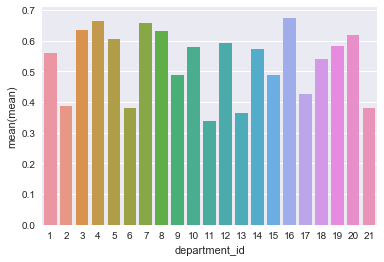

In [89]:
sns.barplot(x="department_id", y="mean", data=df)

##  Analyze aisle_id

In [96]:
df = df_oreder_products_train_products_merged.groupby('aisle_id').describe()

In [91]:
df = df.reordered

In [93]:
df.to_csv('aisle_reorder.csv')

In [94]:
df = pd.read_csv('aisle_reorder.csv')

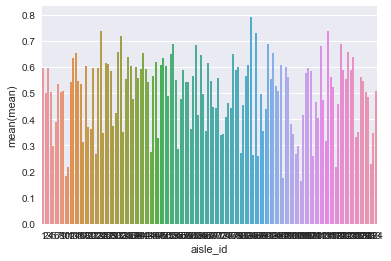

In [95]:
sns.barplot(x="aisle_id", y="mean", data=df)

#  2. Split df_order into df_train, df_test and df_prior

In [99]:
df_train = df_order[df_order.eval_set == 'train']

In [102]:
df_train.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


In [100]:
df_test = df_order[df_order.eval_set == 'test']

In [105]:
df_test = df_test.sort_values('order_id')

In [106]:
df_test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
611292,17,36855,test,5,6,15,1.0
584613,34,35220,test,20,3,11,8.0
3102779,137,187107,test,9,2,19,30.0
1929637,182,115892,test,28,0,11,8.0
590591,257,35581,test,9,6,23,5.0


In [101]:
df_prior = df_order[df_order.eval_set == 'prior']

In [104]:
df_prior.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


#  Count the number of ordered items

In [123]:
def number_of_item(order_id):
    return len(df_order_products_train[df_order_products_train.order_id == order_id])

In [114]:
df_train['ordered_item_number'] = -1

/Users/takuyasakaguchi/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [116]:
df_train['ordered_item_number'] = df_train['order_id'].apply(number_of_item)

/Users/takuyasakaguchi/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [117]:
df_train.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,ordered_item_number
10,1187899,1,train,11,4,8,14.0,11
25,1492625,2,train,15,1,11,30.0,31
49,2196797,5,train,5,0,11,6.0,9
74,525192,7,train,21,2,11,6.0,9
78,880375,8,train,4,1,14,10.0,18


In [118]:
df_train.to_csv('train_with_ordered_item.csv', index = False)

In [121]:
df_reordered = df_order_products_train[df_order_products_train.reordered == 1]

In [124]:
def number_of_reordered_item(order_id):
    return len(df_reordered[df_reordered.order_id == order_id])

In [126]:
number_of_reordered_item(716)

0

In [127]:
df_train['reordered_item_number'] = -1

/Users/takuyasakaguchi/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [128]:
df_train.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,ordered_item_number,reordered_item_number
10,1187899,1,train,11,4,8,14.0,11,-1
25,1492625,2,train,15,1,11,30.0,31,-1
49,2196797,5,train,5,0,11,6.0,9,-1
74,525192,7,train,21,2,11,6.0,9,-1
78,880375,8,train,4,1,14,10.0,18,-1


In [129]:
df_train['reordered_item_number'] = df_train['order_id'].apply(number_of_reordered_item)

/Users/takuyasakaguchi/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [130]:
df_train.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,ordered_item_number,reordered_item_number
10,1187899,1,train,11,4,8,14.0,11,10
25,1492625,2,train,15,1,11,30.0,31,12
49,2196797,5,train,5,0,11,6.0,9,4
74,525192,7,train,21,2,11,6.0,9,8
78,880375,8,train,4,1,14,10.0,18,4


In [132]:
df_train.to_csv('train_order_reorder.csv')

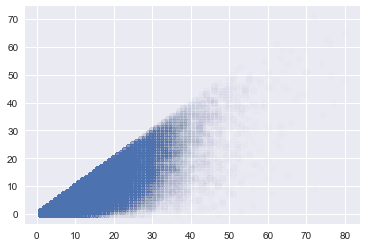

In [137]:
plt.scatter(df_train.ordered_item_number, df_train.reordered_item_number, alpha = 0.01)

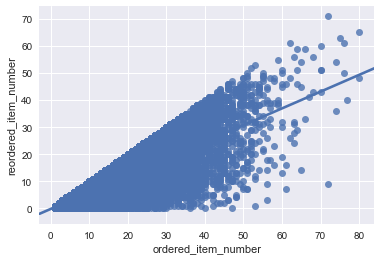

In [140]:
sns.regplot(x="ordered_item_number", y="reordered_item_number", data=df_train, ci =70)

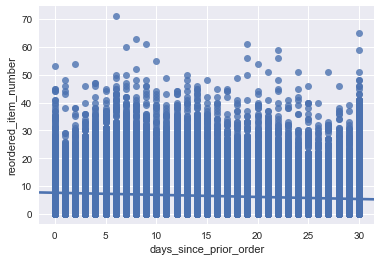

In [141]:
sns.regplot(x="days_since_prior_order", y="reordered_item_number", data=df_train, ci =70)

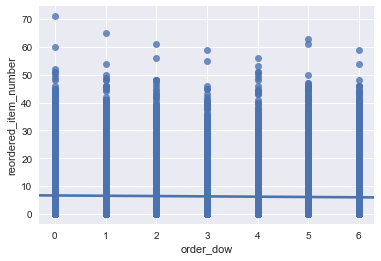

In [142]:
sns.regplot(x="order_dow", y="reordered_item_number", data=df_train, ci =70)

In [143]:
df = df_train

In [145]:
df['reordered_ratio'] = df['reordered_item_number']/df['ordered_item_number']

/Users/takuyasakaguchi/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [146]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,ordered_item_number,reordered_item_number,reordered_ratio
10,1187899,1,train,11,4,8,14.0,11,10,0.909091
25,1492625,2,train,15,1,11,30.0,31,12,0.387097
49,2196797,5,train,5,0,11,6.0,9,4,0.444444
74,525192,7,train,21,2,11,6.0,9,8,0.888889
78,880375,8,train,4,1,14,10.0,18,4,0.222222


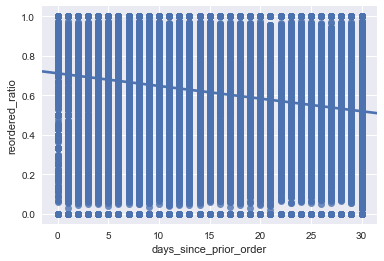

In [149]:
sns.regplot(x="days_since_prior_order", y="reordered_ratio", data=df)

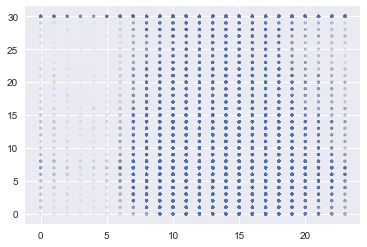

In [158]:
plt.scatter(df.order_hour_of_day, df.days_since_prior_order, s = df.reordered_ratio*10, alpha = 0.01)

###  60.2% of items are reordered in the train dataset

In [159]:
np.mean(df.reordered_ratio)

0.60247219455959589

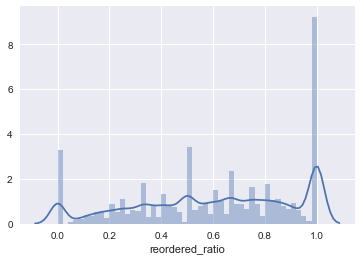

In [160]:
sns.distplot(df.reordered_ratio)

#  Predict 'ordered_item_number' and 'reordered_item_number'  in the test dataset.


In [161]:
df_train.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,ordered_item_number,reordered_item_number,reordered_ratio
10,1187899,1,train,11,4,8,14.0,11,10,0.909091
25,1492625,2,train,15,1,11,30.0,31,12,0.387097
49,2196797,5,train,5,0,11,6.0,9,4,0.444444
74,525192,7,train,21,2,11,6.0,9,8,0.888889
78,880375,8,train,4,1,14,10.0,18,4,0.222222


In [162]:
df_test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
611292,17,36855,test,5,6,15,1.0
584613,34,35220,test,20,3,11,8.0
3102779,137,187107,test,9,2,19,30.0
1929637,182,115892,test,28,0,11,8.0
590591,257,35581,test,9,6,23,5.0


#  to be continuted tomorrow...